# Sentiment Analysis of IMDB Movie Reviews
# Data-Driven Insights
Sentiment analysis allows for the extraction of valuable insights from a large volume of unstructured data. By analyzing sentiments, you can gain a deeper understanding of how viewers perceive a movie, which can inform decision-making.

# Real-time Feedback
IMDB reviews provide real-time feedback from a diverse audience. Filmmakers and studios can monitor public sentiment immediately after a movie's release, enabling them to respond quickly to positive or negative trends.

# Market Research
Sentiment analysis helps in market research by identifying trends in movie preferences. This information is useful for studios and producers to make data-driven decisions regarding future film projects, genres, or casting choices.

# Quality Assessment
Filmmakers can use sentiment analysis to assess the quality of their work. By understanding what aspects of a movie resonate with viewers and which ones don't, they can focus on improving their storytelling, cinematography, and other elements.

# Marketing and Promotion
Positive sentiment analysis can be leveraged in marketing campaigns. Movie studios can highlight positive reviews and audience reactions to attract more viewers and generate buzz around a film, which can positively impact its box office performance.

Overall, sentiment analysis of IMDB movie reviews offers actionable insights that can benefit filmmakers, studios, and the film industry as a whole. It provides a data-driven approach to understanding audience preferences and improving the quality of movies.

# Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Reading Dataset

In [47]:
df=pd.read_csv('IMDB Dataset.csv')

In [262]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [261]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

# Data Preprocessing

In [263]:
shuffled_indices = np.random.permutation(len(df))
shuffled_df = df.iloc[shuffled_indices].reset_index(drop=True)
shuffled_df.head(10)

,review,sentiment
0,"This is a solid underrated little thriller, th...",positive
1,I was probably one of the few Australians not ...,positive
2,Michael Is King. This film contains some of th...,positive
3,This movie is similar to the play entitled 'Bl...,negative
4,"Superb comic farce from Paul Mazursky, Richard...",positive
5,"Although coming after three Star Wars, Krull &...",negative
6,The cast for this production of Rigoletto is e...,positive
7,I was aware of Man of the Year's critical pans...,negative
8,I grew up in New York and this show came on wh...,positive
9,I have waited a long time to see this movie. I...,negative


In [264]:
#Replacing Sentiments with 0 and 1 to make our data compatible for machine learning model to work with
shuffled_df['sentiment'].replace({'positive':0,'negative':1},inplace=True)

In [265]:
shuffled_df.head(10)

,review,sentiment
0,"This is a solid underrated little thriller, th...",0
1,I was probably one of the few Australians not ...,0
2,Michael Is King. This film contains some of th...,0
3,This movie is similar to the play entitled 'Bl...,1
4,"Superb comic farce from Paul Mazursky, Richard...",0
5,"Although coming after three Star Wars, Krull &...",1
6,The cast for this production of Rigoletto is e...,0
7,I was aware of Man of the Year's critical pans...,1
8,I grew up in New York and this show came on wh...,0
9,I have waited a long time to see this movie. I...,1


In [266]:
x=shuffled_df.review
y=shuffled_df.sentiment

# Visualization of Data Clasess

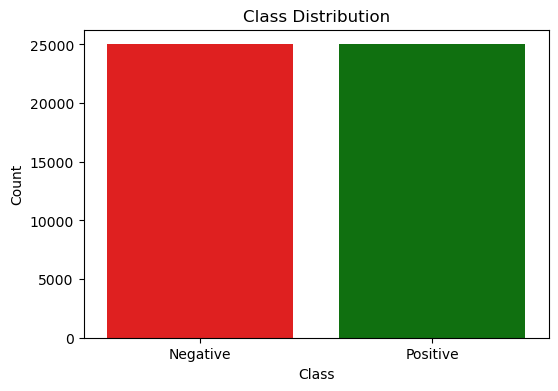

In [267]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
y = np.array(y)
classes = ['Negative', 'Positive']
# Converting numerical labels to class labels
y_labels = [classes[label] for label in y]
# Create a countplot with custom colors
plt.figure(figsize=(6, 4))
sns.countplot(x=y_labels, palette={'Negative': 'red', 'Positive': 'green'})
plt.xticks([0, 1], classes)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Here a  series of preprocessing steps are applied to a text dataset, including the removal of non-word characters, conversion to lowercase, stripping HTML tags, eliminating single-letter words between spaces, removing single-letter words before spaces, and reducing multiple spaces to single spaces. These transformations are essential for cleaning and standardizing text data, preparing it for subsequent analysis, such as sentiment analysis.

In [268]:
corpus=[]
for i in range(0,50000):
    rev=re.sub(r'\W',' ',str(x[i]))    #removing all non words characters
    rev=rev.lower()                    #converting to lower case
    rev=re.sub(r'<.*?>', '',rev)       #removing all html tags
    rev=re.sub(r'\s+[a-z]\s+',' ',rev) #removing all single words between spaces
    rev=re.sub(r'^[a-z]\s+',' ',rev)   #removing all single words before the space
    rev=re.sub(r'\s+',' ',rev)         #removing all extra spaces
    corpus.append(rev)

# Converting to Bag of Words models

In [269]:
vectorizer=CountVectorizer(max_features=4000,max_df=0.50,min_df=3,stop_words=stopwords.words('english'))
x=vectorizer.fit_transform(corpus).toarray()

In [284]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

# Fitting Naive Bayes Models 

In [285]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,ComplementNB

# BernoulliNB Model

In [307]:
clf_G=BernoulliNB(alpha=0.5)

In [308]:
clf_G.fit(x_train,y_train);

# Model Evaluation

In [309]:
accuracy=clf_G.score(x_test,y_test)
print('Accuracy:',accuracy*100)

Accuracy: 85.88


In [310]:
y_preds=clf_G.predict(x_test)

In [311]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

<Axes: >

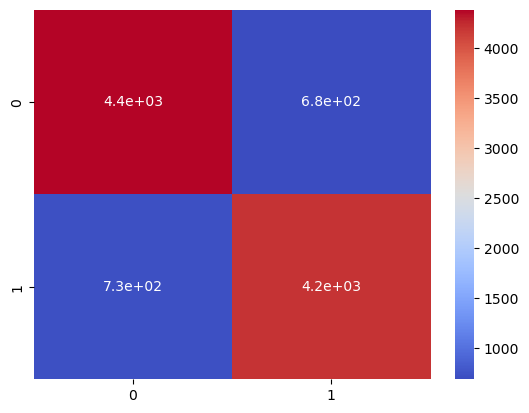

In [312]:
cm=confusion_matrix(y_test,y_preds)
sns.heatmap(cm,annot=True,cmap='coolwarm')

# Classification Report of BernoulliNB

In [313]:
cr=classification_report(y_test,y_preds)
print('classification Report:',cr)

classification Report:               precision    recall  f1-score   support

           0       0.86      0.86      0.86      5071
           1       0.86      0.85      0.86      4929

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# GaussianNB Model

In [193]:
clf_NB=GaussianNB()

In [194]:
clf_NB.fit(x_train,y_train);

# Model Evaluation

In [197]:
Accuracy=clf_NB.score(x_test,y_test)
print('Accuracy:',Accuracy*100)

Accuracy: 75.57000000000001


In [198]:
y_preds=clf_NB.predict(x_test)

<Axes: >

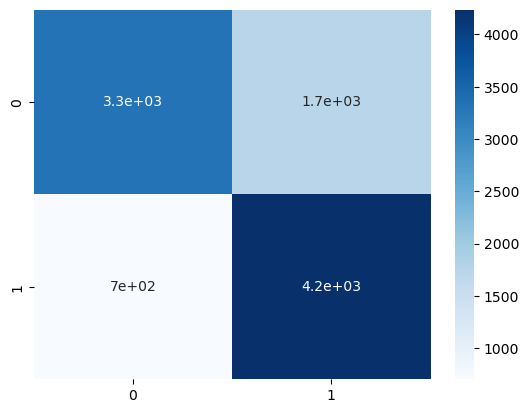

In [199]:
cm=confusion_matrix(y_test,y_preds)
sns.heatmap(cm,annot=True,cmap='Blues')

In [200]:
cr=classification_report(y_test,y_preds)
print('classification Report:',cr)

classification Report:               precision    recall  f1-score   support

           0       0.83      0.66      0.73      5061
           1       0.71      0.86      0.78      4939

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.75     10000
weighted avg       0.77      0.76      0.75     10000



# MultinomialNB Model

In [201]:
clf_M=MultinomialNB()

In [203]:
clf_M.fit(x_train,y_train);

# Model Evaluation

In [206]:
Accuracy=clf_M.score(x_test,y_test)
print('Accuracy:',Accuracy*100)

Accuracy: 85.35000000000001


In [209]:
y_pred=clf_M.predict(x_test)

<Axes: >

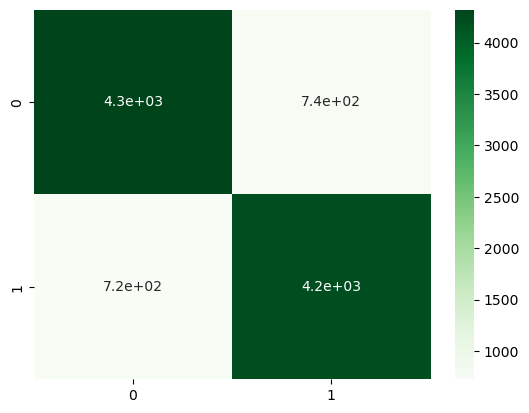

In [222]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Greens')

# Classification Report

In [210]:
cr=classification_report(y_test,y_pred)
print('classification Report:',cr)

classification Report:               precision    recall  f1-score   support

           0       0.86      0.85      0.86      5061
           1       0.85      0.85      0.85      4939

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# ComplementNB Model

In [224]:
clf_C=ComplementNB()

In [227]:
clf_C.fit(x_train,y_train);

# Model Evlauation

In [230]:
y_prob=clf_C.predict(x_test)

In [235]:
Accuracy=clf_C.score(x_test,y_test)
print('Accuracy:',Accuracy*100)

Accuracy: 85.35000000000001


<Axes: >

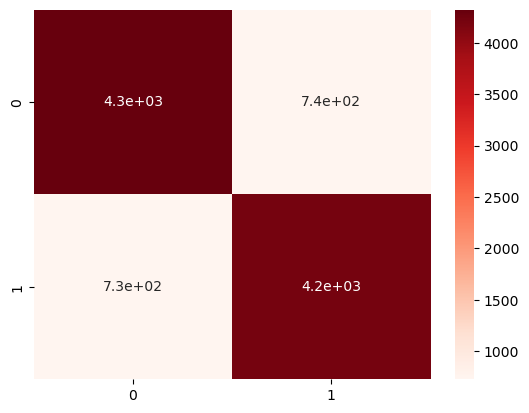

In [242]:
cm=confusion_matrix(y_test,y_prob)
sns.heatmap(cm,annot=True,cmap='Reds')

# Classification Report

In [244]:
cr=classification_report(y_test,y_prob)
print('classification Report:',cr)

classification Report:               precision    recall  f1-score   support

           0       0.86      0.85      0.86      5061
           1       0.85      0.85      0.85      4939

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Comparison of Models' Accuracy 

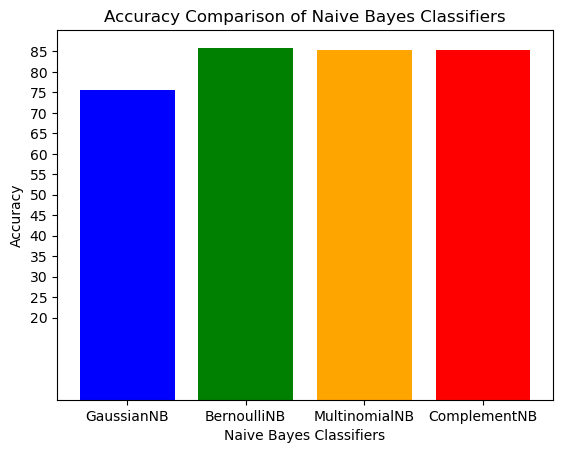

In [334]:
import matplotlib.pyplot as plt
classifier_names = ['GaussianNB', 'BernoulliNB', 'MultinomialNB', 'ComplementNB']
accuracy_scores = [75.57, 85.88, 85.35, 85.35]
# Plot the accuracy scores
plt.bar(classifier_names, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Naive Bayes Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Naive Bayes Classifiers')
plt.yticks(range(20,90, 5))
plt.show()

# Conclusion

 In the performance comparison of Naive Bayes classifiers, we used a bar chart to visualize the accuracy scores of four classifiers: GaussianNB, BernoulliNB, MultinomialNB, and ComplementNB. The chart clearly illustrates how these classifiers perform on a given task. BernoulliNB achieved the highest accuracy at 85.75%, followed closely by MultinomialNB and ComplementNB, both at 85.35%. GaussianNB, while still performing decently, had the lowest accuracy score at 75.57%. The chart helps us quickly assess and compare their performance

# Testing our Model/Deployemet 

In [337]:
import pickle 
with open('NB_claassifier.pickle','wb') as f:
    pickle.dump(clf_G,f)

In [338]:
with open('vec.pickle','wb') as f:
    pickle.dump(vectorizer,f)

In [339]:
#unpickling our model to test input text
with open('NB_claassifier.pickle','rb') as f:
    clf=pickle.load(f)

In [340]:
with open('vec.pickle','rb') as f:
    bow=pickle.load(f)

In [388]:
sample=['''I watched that movie last night, and it was a
complete disappointment. it was good movie.The storyline was weak, the
acting was subpar, and I found myself bored throughout
the entire film.I wouldn't recommend wasting your time on it.''']

In [389]:
sample=bow.transform(sample).toarray()

In [390]:
prob=clf.predict(sample)

In [392]:
prediction='Negative' if prob ==1 else 'Postive'
print(f'{prediction} Review')

Negative Review
